## DLNLP Test-1


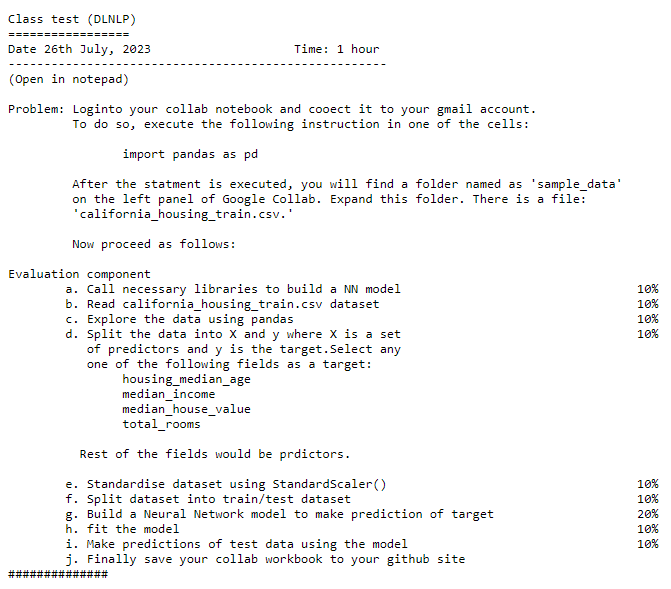

#### Imports

In [3]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 1.1
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Loading Data

In [5]:
# 2.1 Read data

path = "/content/sample_data/"

In [15]:
# 2.2
data = pd.read_csv(path + "california_housing_train.csv")

#### Exploring

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [9]:
data.shape #(17000, 9)

(17000, 9)

In [11]:
data.isnull().sum() #full

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
#We select 'median_house_value' to be our target

y = data.pop('median_house_value')

In [18]:
X = data

In [23]:
X.shape

(17000, 8)

In [19]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)

#### Scaling

In [20]:

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [21]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### Model

In [33]:
model = tf.keras.Sequential()

In [34]:

# 6.1
model.add( tf.keras.layers.Input(shape = (8,) ))

In [35]:
model.add(tf.keras.layers.Dense(512, activation = 'selu'))

In [36]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [37]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [38]:
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               4608      
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 530,433
Trainable params: 530,433
Non-trainable params: 0
_________________________________________________________________


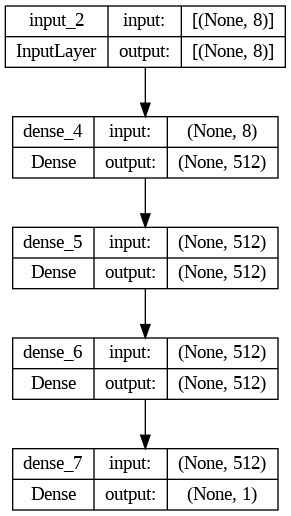

In [40]:
plot_model(model, show_shapes=True)

In [41]:
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['acc', 'mae']
              )

In [42]:
history1 = model.fit(X_train,y_train,
                    epochs = 100,
                    validation_data = (X_test, y_test),
                     verbose=0
                   )

In [43]:
history1.history.keys()

dict_keys(['loss', 'acc', 'mae', 'val_loss', 'val_acc', 'val_mae'])

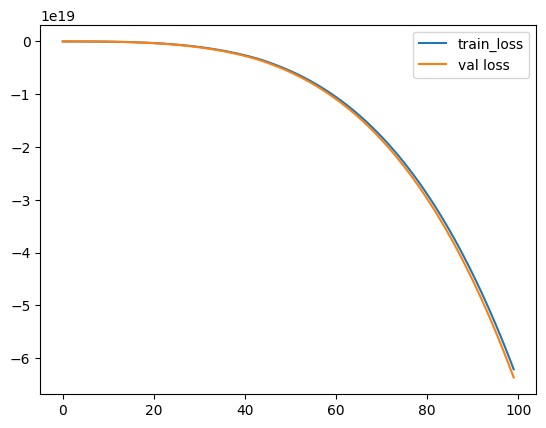

In [44]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

#### Model 2

In [53]:
model = tf.keras.Sequential()

In [54]:
model.add( tf.keras.layers.Input(shape = (8,) ))

In [55]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [56]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [57]:
model.add(tf.keras.layers.Dense(1, activation = 'linear'))

In [58]:
model.compile(
                 loss = 'mae',
                 optimizer = 'adam',
                 metrics = ['acc', 'mae']
              )

In [59]:
history2 = model.fit(X_train,y_train,
                    epochs = 100,
                    validation_data = (X_test, y_test),
                     verbose=1
                   )

Epoch 1/100
399/399 [==============================] - 4s 9ms/step - loss: 183400.8906 - acc: 0.0000e+00 - mae: 183400.8906 - val_loss: 125715.2500 - val_acc: 0.0000e+00 - val_mae: 125715.2500
Epoch 2/100
399/399 [==============================] - 5s 13ms/step - loss: 92594.5391 - acc: 0.0000e+00 - mae: 92594.5391 - val_loss: 75199.9688 - val_acc: 0.0000e+00 - val_mae: 75199.9688
Epoch 3/100
399/399 [==============================] - 6s 15ms/step - loss: 66106.8672 - acc: 0.0000e+00 - mae: 66106.8672 - val_loss: 61818.3906 - val_acc: 0.0000e+00 - val_mae: 61818.3906
Epoch 4/100
399/399 [==============================] - 4s 10ms/step - loss: 57119.5430 - acc: 0.0000e+00 - mae: 57119.5430 - val_loss: 55582.6211 - val_acc: 0.0000e+00 - val_mae: 55582.6211
Epoch 5/100
399/399 [==============================] - 4s 10ms/step - loss: 52317.0391 - acc: 0.0000e+00 - mae: 52317.0391 - val_loss: 51591.7422 - val_acc: 0.0000e+00 - val_mae: 51591.7422
Epoch 6/100
399/399 [==========================

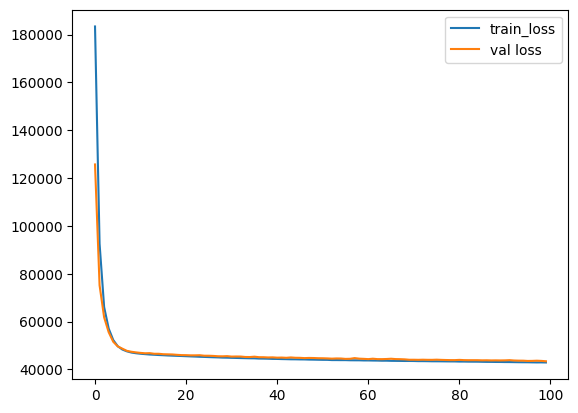

In [64]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

In [65]:
pred = np.round(model.predict(X_test))

133/133 [==============================] - 0s 2ms/step


#### Model 3

In [76]:
model = tf.keras.Sequential()

In [77]:
model.add( tf.keras.layers.Input(shape = (8,) ))

In [78]:
model.add(tf.keras.layers.Dense(256, ))

In [79]:
model.add(tf.keras.layers.Dense(256, ))

In [80]:
model.add(tf.keras.layers.Dense(1, ))

In [81]:
model.compile(
                 loss = 'mae',
                 metrics = ['acc', 'mae']
              )

In [82]:
history3 = model.fit(X_train,y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test),
                     verbose=1
                   )

Epoch 1/50
399/399 [==============================] - 9s 19ms/step - loss: 205468.0156 - acc: 0.0000e+00 - mae: 205468.0156 - val_loss: 201384.7656 - val_acc: 0.0000e+00 - val_mae: 201384.7656
Epoch 2/50
399/399 [==============================] - 5s 12ms/step - loss: 186201.5469 - acc: 0.0000e+00 - mae: 186201.5469 - val_loss: 164666.7656 - val_acc: 0.0000e+00 - val_mae: 164666.7656
Epoch 3/50
399/399 [==============================] - 7s 17ms/step - loss: 127749.4922 - acc: 0.0000e+00 - mae: 127749.4922 - val_loss: 86803.0156 - val_acc: 0.0000e+00 - val_mae: 86803.0156
Epoch 4/50
399/399 [==============================] - 5s 13ms/step - loss: 63652.4883 - acc: 0.0000e+00 - mae: 63652.4883 - val_loss: 54424.2656 - val_acc: 0.0000e+00 - val_mae: 54424.2656
Epoch 5/50
399/399 [==============================] - 5s 12ms/step - loss: 52512.4375 - acc: 0.0000e+00 - mae: 52512.4375 - val_loss: 52240.9297 - val_acc: 0.0000e+00 - val_mae: 52240.9297
Epoch 6/50
399/399 [=========================

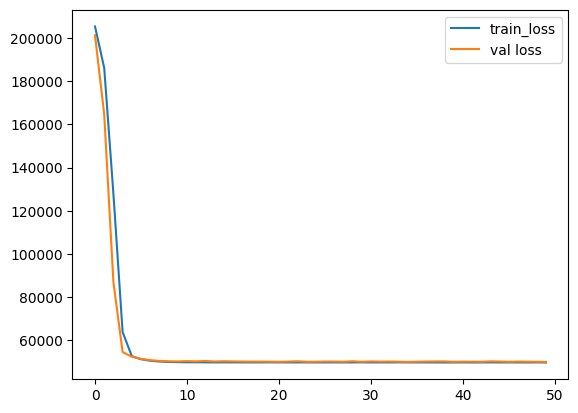

In [83]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

#### Model 4

In [105]:
model = tf.keras.Sequential()

In [106]:
model.add( tf.keras.layers.Input(shape = (8,) ))

In [107]:
model.add(tf.keras.layers.Dense(256, 'relu'))

In [108]:
model.add(tf.keras.layers.Dense(256, 'relu'))

In [109]:
model.add(tf.keras.layers.Dense(1, ))

In [110]:
model.compile(
                 loss = 'mae',
                 metrics = ['acc', 'mae']
              )

In [ ]:
history4 = model.fit(X_train,y_train,
                    epochs = 20,
                    validation_data = (X_test, y_test),
                     verbose=1
                   )

Epoch 1/20
399/399 [==============================] - 4s 10ms/step - loss: 45717.5508 - acc: 0.0000e+00 - mae: 45717.5508 - val_loss: 46184.8359 - val_acc: 0.0000e+00 - val_mae: 46184.8359
Epoch 2/20
399/399 [==============================] - 2s 5ms/step - loss: 45660.4727 - acc: 0.0000e+00 - mae: 45660.4727 - val_loss: 46130.2656 - val_acc: 0.0000e+00 - val_mae: 46130.2656
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 45614.3516 - acc: 0.0000e+00 - mae: 45614.3516 - val_loss: 46179.2734 - val_acc: 0.0000e+00 - val_mae: 46179.2734
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 45560.8125 - acc: 0.0000e+00 - mae: 45560.8125 - val_loss: 46031.2773 - val_acc: 0.0000e+00 - val_mae: 46031.2773
Epoch 5/20
399/399 [==============================] - 2s 4ms/step - loss: 45500.9844 - acc: 0.0000e+00 - mae: 45500.9844 - val_loss: 46004.1875 - val_acc: 0.0000e+00 - val_mae: 46004.1875
Epoch 6/20
399/399 [==============================] - 2s 5m

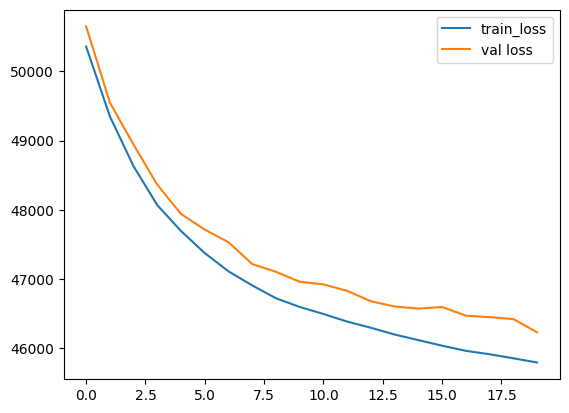

In [113]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()